In [116]:
import pandas as pd
import numpy as np


train=pd.read_csv('C:/Users/inha/Desktop/FIFA/FIFA_train.csv')
test=pd.read_csv('C:/Users/inha/Desktop/FIFA/FIFA_test.csv')
submission=pd.read_csv('C:/Users/inha/Desktop/FIFA/submission.csv')             

In [117]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [118]:
train['name']

0                 L. Messi
1                   De Gea
2                L. Suárez
3             Sergio Ramos
4                 J. Oblak
               ...        
8927            S. Adewusi
8928             C. Ehlich
8929            N. Fuentes
8930              J. Milli
8931    N. Christoffersson
Name: name, Length: 8932, dtype: object

In [120]:
train.loc[train['name']=='L. Messi','value']  , train.loc[train['name']=='L. Messi','value']

          


0    110500000.0
Name: value, dtype: float64

1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

In [3]:
submission

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


In [4]:
# 우선 id 대로 정렬을 하자

In [5]:
train.columns # id name 삭제하고 생각해보자
# 일단 외국인쿼터제도 있기에 보통 어떠한 대륙리그의 선수들 몸값이 높을것인지
# 계약기간별 포지션별 선호발별 유명도별 현재인지도 별 등등등 
# 어떠한 feature가 중요할지도 파악해보자 

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [6]:
train.info() #결측치 없고, 생각보다 object가 많네 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
Jan 12, 2019       1
May 31, 2020       1
2026               1
Name: contract_until, dtype: int64

In [8]:
train.loc[train['contract_until']=='Jun 30, 2019','contract_until']='2019'

In [9]:
train.loc[train['contract_until']=='Dec 31, 2018','contract_until']='2018'

In [10]:
train.loc[train['contract_until']=='Jun 30, 2020','contract_until']='2020'

In [11]:
train.loc[train['contract_until']=='May 31, 2020','contract_until']='2020'

In [12]:
train.loc[train['contract_until']=='May 31, 2019','contract_until']='2019'

In [13]:
train.loc[train['contract_until']=='Jan 31, 2019','contract_until']='2019'

In [14]:
train.loc[train['contract_until']=='Jan 1, 2019','contract_until']='2019'

In [15]:
train.loc[train['contract_until']=='Jan 12, 2019','contract_until']='2019'

In [16]:
test['contract_until'].unique()

array(['2022', '2023', '2020', '2021', 'Jun 30, 2019', '2019', '2025',
       '2024', '2018', 'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019',
       'Dec 31, 2019', 'Dec 31, 2018', 'Jun 1, 2019', 'Jan 1, 2019',
       'Jan 31, 2019', '2026'], dtype=object)

In [17]:
test.loc[test['contract_until']=='Jun 30, 2019','contract_until']='2019'

In [18]:
test.loc[test['contract_until']=='May 31, 2020','contract_until']='2020'

In [19]:
test.loc[test['contract_until']=='Jun 30, 2020','contract_until']='2020'

In [20]:
test.loc[test['contract_until']=='May 31, 2019','contract_until']='2019'

In [21]:
test.loc[test['contract_until']=='Dec 31, 2019','contract_until']='2019'

In [22]:
test.loc[test['contract_until']=='Dec 31, 2018','contract_until']='2018'

In [23]:
test.loc[test['contract_until']=='Jun 1, 2019','contract_until']='2019'

In [24]:
test.loc[test['contract_until']=='Jan 1, 2019','contract_until']='2019'

In [25]:
test.loc[test['contract_until']=='Jan 31, 2019','contract_until']='2019'

In [26]:
#계약기간은 int형으로 바로 바꿔버리고 
#prefer foot  position continent 수치형으로 변경(라벨인코더 또는 직접변경 )

train['contract_until']=train['contract_until'].astype('int')
test['contract_until']=test['contract_until'].astype('int')


In [27]:
# 원래는 게약기간도 6개월 단위로 끊기겠지만 이미 수치형으로 있는 데이터가 너무 많아서 년도로 통일 

In [28]:
train['continent'].unique(),  train['position'].unique(),  train['prefer_foot'].unique()

(array(['south america', 'europe', 'africa', 'asia', 'oceania'],
       dtype=object),
 array(['ST', 'GK', 'DF', 'MF'], dtype=object),
 array(['left', 'right'], dtype=object))

- from sklearn import preprocessing

    - le=preprocessing.LabelEncoder()
    - train['continent']=le.fit_transform(train['continent'])
    - train['position']=le.fit_transform(train['position'])
    - train['prefer_foot']=le.fit_transform(train['prefer_foot'])


In [29]:
train.loc[train['prefer_foot']=='left','prefer_foot']=0
train.loc[train['prefer_foot']=='right','prefer_foot']=1

train.loc[train['continent']=='south america','continent']=0
train.loc[train['continent']=='europe','continent']=1
train.loc[train['continent']=='africa','continent']=2
train.loc[train['continent']=='asia','continent']=3
train.loc[train['continent']=='oceania','continent']=4

train.loc[train['position']=='ST','position']=0
train.loc[train['position']=='GK','position']=1
train.loc[train['position']=='DF','position']=2
train.loc[train['position']=='MF','position']=3

In [30]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,0,2021,0,0,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,1,2020,1,1,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,0,2021,0,1,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,1,2020,2,1,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,1,2021,1,1,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,2,2019,3,1,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,1,2020,2,1,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,0,2021,2,1,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,1,2021,1,1,1.0,47,65,1.0,50000.0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int32  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 802.6+ KB


In [32]:
train[['continent','position','prefer_foot']]   =train[['continent','position','prefer_foot']].astype('int')

In [33]:
train.drop(['name'],axis=1,inplace=True)

In [34]:
train=train.sort_values(by='value',ascending=False)
train

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,0,2021,0,0,5.0,94,94,4.0,110500000.0
2,7,31,0,2021,0,1,5.0,91,91,3.0,80000000.0
17,30,26,1,2022,0,1,3.0,88,91,4.0,73500000.0
1,3,27,1,2020,1,1,4.0,91,93,1.0,72000000.0
14,26,26,2,2023,3,0,3.0,88,89,4.0,69500000.0
...,...,...,...,...,...,...,...,...,...,...,...
8737,16497,36,1,2021,1,1,1.0,53,53,1.0,10000.0
8534,16043,37,3,2021,1,1,1.0,55,55,1.0,10000.0
8274,15465,36,3,2021,2,1,1.0,57,57,2.0,10000.0
8158,15182,37,1,2018,1,1,1.0,58,58,1.0,10000.0


In [35]:
train.groupby('age')['value'].agg(['count','mean'])

,count,mean
age,,
16,18,2.791667e+05
17,131,4.297710e+05
18,344,5.920203e+05
19,491,9.187475e+05
20,582,1.294974e+06
21,676,2.091243e+06
22,632,2.499312e+06
23,663,3.124216e+06
24,691,3.325760e+06


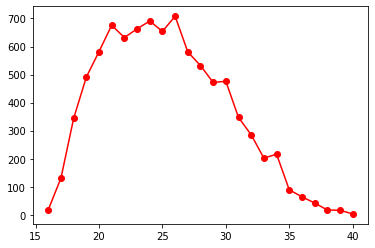

In [36]:
#age별

import matplotlib.pyplot as plt

train.groupby('age')['value'].agg(['count','mean'])
plt.plot(train.groupby('age')['value'].count(),'ro-')

# 21~26세의 선수들이 가장 많다 

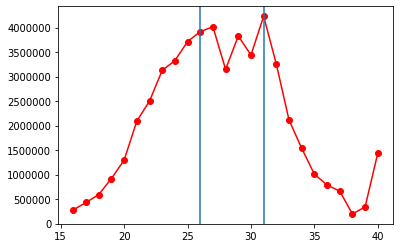

In [37]:
plt.plot(train.groupby('age')['value'].mean(),'ro-')
plt.axvline(x=26)
plt.axvline(x=31)



# 몸값은 26~31세 구간에서 가장 높다 즉, 이 나이대 구간이 전성기라 볼 수 있음...

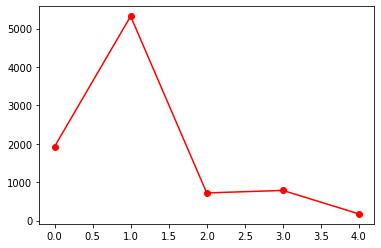

In [38]:
#continent별

train.groupby('continent').agg(['count','mean'])

train.groupby('continent')['value'].agg(['count','mean'])
plt.plot(train.groupby('continent')['value'].count(),'ro-')

# 1대륙에서 가장 많고 4대륙에서 가장 적네 즉, 유럽 선수들이 가장많고 오세아니아 대륙선수들이 가장 적다.

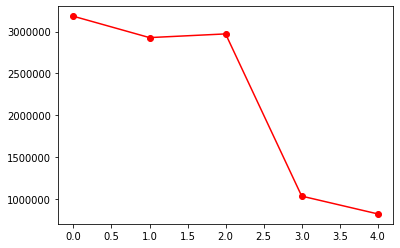

In [39]:
plt.plot(train.groupby('continent')['value'].mean(),'ro-')

# 0 1 2 즉, 사우스 아프리가 유럽, 아프리카가 몸값이 높고 아시아, 오세아니아는 선수들의 몸값평균이 매우 적음.

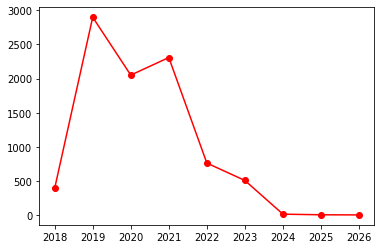

In [40]:
# contract_until별

train.groupby('contract_until').agg(['count','mean'])


train.groupby('contract_until')['value'].agg(['count','mean'])
plt.plot(train.groupby('contract_until')['value'].count(),'ro-')

# 계약기간이 2019, 2020, 2021 선수들이 가장많고 계약기간이 뒤쪽 선수들은 거의 없군

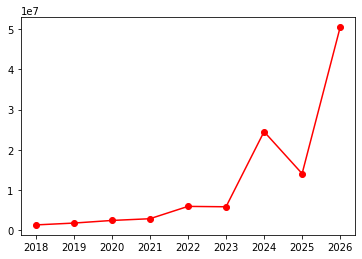

In [41]:
plt.plot(train.groupby('contract_until')['value'].mean(),'ro-')

# 계약기간이 긴 선수들의 몸값 평균이 높다, 아무래도 잘하는 선수들을 싼값에 오랜기간 잡아 놓으려고 그런듯...
# 그렇다면 계약기간이 길게 남은 선수들이 적은것도 메시나 날두처럼 엄청잘하는 선수는 없기떄문이라고 이해해도 될듯???

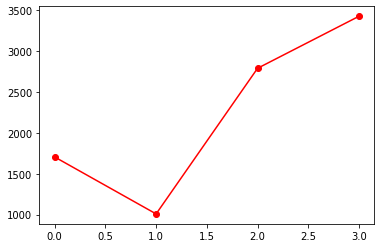

In [42]:
# position별

train.groupby('position').agg(['count','mean'])

plt.plot(train.groupby('position')['value'].count(),'ro-')


# 미드필더가 제일 많고 디펜스 공격수 골키퍼 순
# 현대 축구에서 미드필더와 수비수가 많다 

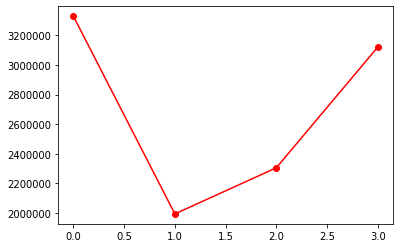

In [43]:
plt.plot(train.groupby('position')['value'].mean(),'ro-')

# 공격수가 가장 비싸고 미드필더 디펜스 골키퍼순으로 값어치가 있네 아주 상식적이구만

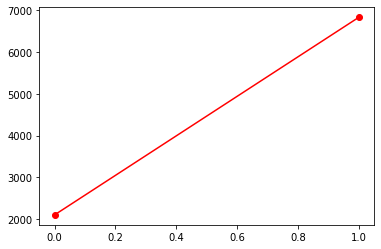

In [44]:
# prefer_foot별

train.groupby('prefer_foot').agg(['count','mean'])

plt.plot(train.groupby('prefer_foot')['value'].count(),'ro-')

#왼발잡이0 보다 오른발잡이가 1 압도적으로 많군, 그렇다면 몸값은 어떠할까

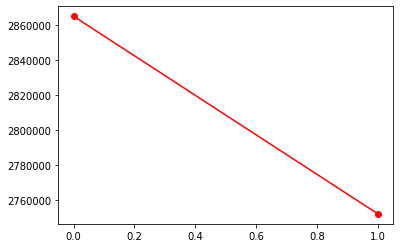

In [45]:
plt.plot(train.groupby('prefer_foot')['value'].mean(),'ro-')

# 몸값은 왼발잡이가 더 높다 아무래도 희소성의 영향이라고 판단됨

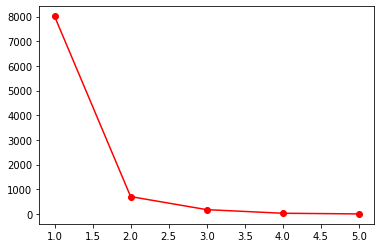

In [46]:
# reputation별

train.groupby('reputation').agg(['count','mean'])

plt.plot(train.groupby('reputation')['value'].count(),'ro-')
#유명한선수는 적은게 당연한거지.....

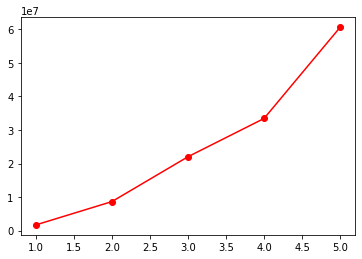

In [47]:
plt.plot(train.groupby('reputation')['value'].mean(),'ro-')

# 역시 명성이 높은선수가 몸값이 좋다

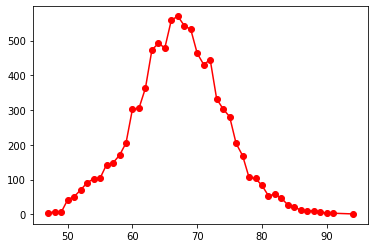

In [48]:
# stat_overall별

train.groupby('stat_overall').agg(['count','mean'])

plt.plot(train.groupby('stat_overall')['value'].count(),'ro-')
#아주 고르게 마치 정규분포 같은 모양으로 현재능력치의 수를 가진 선수들이 분포해 있다.


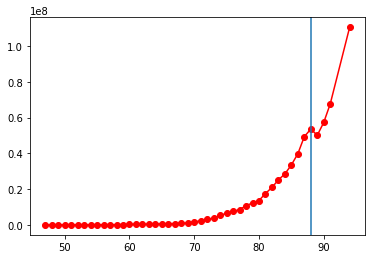

In [49]:
plt.plot(train.groupby('stat_overall')['value'].mean(),'ro-')
plt.axvline(x=88)

#현재 능력치가 높을수록 몸값의 평균 거의 수직상승 희소성이 엄청나므로....


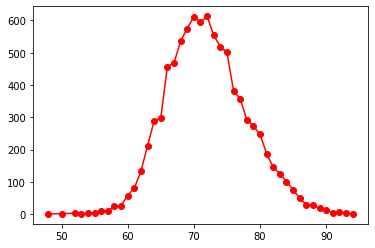

In [50]:
# stat_potential별

train.groupby('stat_potential').agg(['count','mean'])

plt.plot(train.groupby('stat_potential')['value'].count(),'ro-')
#잠재능력을 고르게 가진 선수만큼의 데이터임.

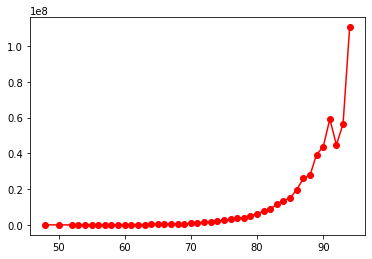

In [51]:
plt.plot(train.groupby('stat_potential')['value'].mean(),'ro-')

#마찬가지로 잠재능력이 좋은 선수가 높은 몸값을 형성하고있음....

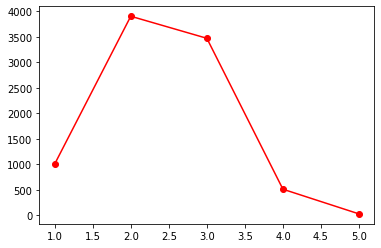

In [52]:
# stat_skill_moves별

train.groupby('stat_skill_moves').agg(['count','mean'])

plt.plot(train.groupby('stat_skill_moves')['value'].count(),'ro-')
#개인기 분포/주로 2, 3중간정도의 개인기를 가진 선수들이 많군

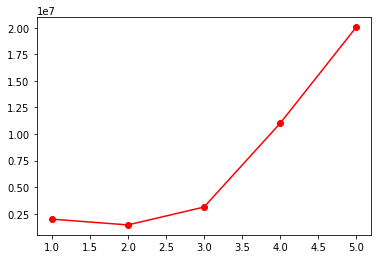

In [53]:
plt.plot(train.groupby('stat_skill_moves')['value'].mean(),'ro-')

#개인기가 높아지면 몸값도 높아지는구나.....

###  말그대로 거의 쭈욱 상승하는 분포를 띄는 피쳐값들은 
- contract_until
- prefer_foot
- reputation
- stat_overall
- stat_potential
- stat_skill_moves


In [54]:
#일단 저러한 features로 타겟값을 예측하고 시간이 되면, 나이 데이터를 카테고리화 하면 끝날듯

In [55]:
train.columns

Index(['id', 'age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [56]:
train.drop('id',axis=1,inplace=True)

In [57]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,0,2021,0,0,5.0,94,94,4.0,110500000.0
2,31,0,2021,0,1,5.0,91,91,3.0,80000000.0
17,26,1,2022,0,1,3.0,88,91,4.0,73500000.0
1,27,1,2020,1,1,4.0,91,93,1.0,72000000.0
14,26,2,2023,3,0,3.0,88,89,4.0,69500000.0
...,...,...,...,...,...,...,...,...,...,...
8737,36,1,2021,1,1,1.0,53,53,1.0,10000.0
8534,37,3,2021,1,1,1.0,55,55,1.0,10000.0
8274,36,3,2021,2,1,1.0,57,57,2.0,10000.0
8158,37,1,2018,1,1,1.0,58,58,1.0,10000.0


In [58]:
train.describe()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,25.209136,1.099978,2020.194357,1.889163,0.765450,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4.635515,0.902957,1.266901,1.117158,0.423741,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,16.000000,0.000000,2018.000000,0.000000,0.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,21.000000,1.000000,2019.000000,1.000000,1.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,1.000000,2020.000000,2.000000,1.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.000000,1.000000,2021.000000,3.000000,1.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,40.000000,4.000000,2026.000000,3.000000,1.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [59]:
train.corr()['value']

#reputation과 stat_overall이 지대한 영향을 끼치는구만

age                 0.087319
continent          -0.093650
contract_until      0.228638
position            0.001506
prefer_foot        -0.008204
reputation          0.665982
stat_overall        0.658444
stat_potential      0.611907
stat_skill_moves    0.298500
value               1.000000
Name: value, dtype: float64

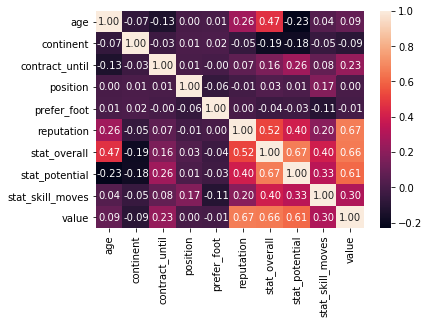

In [60]:
import seaborn as sns

sns.heatmap(train.corr(),annot=True,fmt='.2f')

In [61]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,0,2021,0,0,5.0,94,94,4.0,110500000.0
2,31,0,2021,0,1,5.0,91,91,3.0,80000000.0
17,26,1,2022,0,1,3.0,88,91,4.0,73500000.0
1,27,1,2020,1,1,4.0,91,93,1.0,72000000.0
14,26,2,2023,3,0,3.0,88,89,4.0,69500000.0
...,...,...,...,...,...,...,...,...,...,...
8737,36,1,2021,1,1,1.0,53,53,1.0,10000.0
8534,37,3,2021,1,1,1.0,55,55,1.0,10000.0
8274,36,3,2021,2,1,1.0,57,57,2.0,10000.0
8158,37,1,2018,1,1,1.0,58,58,1.0,10000.0


In [62]:
test.drop(['id','name'],axis=1,inplace=True)

In [63]:
test.loc[test['prefer_foot']=='left','prefer_foot']=0
test.loc[test['prefer_foot']=='right','prefer_foot']=1

test.loc[test['continent']=='south america','continent']=0
test.loc[test['continent']=='europe','continent']=1
test.loc[test['continent']=='africa','continent']=2
test.loc[test['continent']=='asia','continent']=3
test.loc[test['continent']=='oceania','continent']=4

test.loc[test['position']=='ST','position']=0
test.loc[test['position']=='GK','position']=1
test.loc[test['position']=='DF','position']=2
test.loc[test['position']=='MF','position']=3

In [64]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,2022,0,1,5.0,94,94,5.0
1,26,0,2022,0,1,5.0,92,93,5.0
2,27,1,2023,3,1,4.0,91,92,4.0
3,27,1,2020,0,1,4.0,91,91,4.0
4,32,1,2020,3,1,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...
3823,20,3,2021,3,1,1.0,48,63,2.0
3824,18,1,2018,1,1,1.0,48,65,1.0
3825,18,0,2021,3,1,1.0,48,65,2.0
3826,18,1,2020,0,1,1.0,47,61,2.0


In [86]:
## 베이스 모델링

In [65]:
features=['age','continent','contract_until','position','prefer_foot','reputation','stat_overall','stat_potential','stat_skill_moves']
target=['value']

In [77]:
x_train,x_test,y_train=train[features],test[features],train[target]

In [67]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [68]:
model_dict={
    
    'linear':LinearRegression(),
    'rf':RandomForestRegressor(random_state=0,n_jobs=-1),
    'lgbm':lgb.LGBMRegressor(random_state=0)
    
    
}

In [69]:
model_dict

{'linear': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'rf': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False),
 'lgbm': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
            

In [70]:
x_test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,2022,0,1,5.0,94,94,5.0
1,26,0,2022,0,1,5.0,92,93,5.0
2,27,1,2023,3,1,4.0,91,92,4.0
3,27,1,2020,0,1,4.0,91,91,4.0
4,32,1,2020,3,1,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...
3823,20,3,2021,3,1,1.0,48,63,2.0
3824,18,1,2018,1,1,1.0,48,65,1.0
3825,18,0,2021,3,1,1.0,48,65,2.0
3826,18,1,2020,0,1,1.0,47,61,2.0


In [71]:
test[['continent','position','prefer_foot']]=test[['continent','position','prefer_foot']].astype('int')

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   continent         3828 non-null   int32  
 2   contract_until    3828 non-null   int32  
 3   position          3828 non-null   int32  
 4   prefer_foot       3828 non-null   int32  
 5   reputation        3828 non-null   float64
 6   stat_overall      3828 non-null   int64  
 7   stat_potential    3828 non-null   int64  
 8   stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 209.5 KB


In [78]:
model_result={}

for key in model_dict.keys():
    
    print('### 훈련중 ####')
    model_dict[key].fit(x_train,y_train)
    
    print('### 예측중 ####')
    model_result[key]=model_dict[key].predict(x_test)

### 훈련중 ####
### 예측중 ####
### 훈련중 ####


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### 예측중 ####
### 훈련중 ####
### 예측중 ####


In [79]:
model_result.keys()

dict_keys(['linear', 'rf', 'lgbm'])

In [96]:
lr_submit=submission.copy()
rf_submit=submission.copy()
lgbm_submit=submission.copy()


lr_submit.to_csv('lr.csv',index=False)
rf_submit.to_csv('rf.csv',index=False)
lgbm_submit.to_csv('lgbm.csv',index=False)

In [82]:
lr_submit

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


In [84]:
model_result

{'linear': array([[37216710.59902346],
        [38926083.2907995 ],
        [32074538.60994864],
        ...,
        [-4349490.1328789 ],
        [-4730403.36726701],
        [-4775802.79482043]]),
 'rf': array([7.8545e+07, 7.9080e+07, 6.7170e+07, ..., 5.9600e+04, 4.2700e+04,
        5.0800e+04]),
 'lgbm': array([69986747.16111618, 71411957.55158232, 68645796.52880515, ...,
           75610.02090711,    76975.1033101 ,    76703.84600943])}

In [85]:
lr_submit['value']=model_result['linear']
rf_submit['value']=model_result['rf']
lgbm_submit['value']=model_result['lgbm']

In [87]:
## 교차검증 (kfold로)


from sklearn.model_selection import KFold  

In [88]:
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)

In [89]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=2000)

models=[]

for train_idx,val_idx in k_fold.split(x_train):
    x_t=x_train.iloc[train_idx]
    y_t=y_train.iloc[train_idx]

    x_val=x_train.iloc[val_idx]
    y_val=y_train.iloc[val_idx]
    
    models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 4.76598e+11
Early stopping, best iteration is:
[45]	valid_0's l2: 4.50145e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 5.4557e+11
[200]	valid_0's l2: 4.3196e+11
[300]	valid_0's l2: 4.38959e+11
Early stopping, best iteration is:
[240]	valid_0's l2: 4.18205e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.58054e+11
[200]	valid_0's l2: 3.16871e+11
[300]	valid_0's l2: 2.73869e+11
[400]	valid_0's l2: 2.60273e+11
[500]	valid_0's l2: 2.62848e+11
Early stopping, best iteration is:
[488]	valid_0's l2: 2.572e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.26728e+12
[200]	valid_0's l2: 8.92137e+11
[300]	valid_0's l2: 7.8771e+11
[400]	valid_0's l2: 7.10664e+11
[500]	valid_0's l2: 6.72293e+11
[600]	valid_0's l2: 6.383e+11
[700]	valid_0's l2: 6.07294e+11
[800]	valid_0's l2: 5.80963e+11
[900]	valid_0's

In [90]:
models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
      

In [91]:
preds=[]


for model in models:
    preds.append(model.predict(x_test))

In [97]:
kfoldLIghtGBM_submit=submission.copy()
import numpy as np

In [98]:
kfoldLIghtGBM_submit['value']=np.mean(preds,axis=0)
kfoldLIghtGBM_submit

,id,value
0,1,6.502067e+07
1,2,7.278310e+07
2,4,6.751862e+07
3,5,7.708276e+07
4,6,6.146199e+07
...,...,...
3823,16924,5.849567e+04
3824,16929,4.771898e+04
3825,16932,5.747806e+04
3826,16937,5.917595e+04


In [99]:
kfoldLIghtGBM_submit.to_csv('kfoldlgbm.csv',index=False)

In [104]:
## 그리드 서치

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:

model=lgb.LGBMRegressor(random_state=0,n_estimators=2000)


params={
    'lr':[0.1,0.01,0.003],
    'min_child_samples':[20,30]
}

gs=GridSearchCV(estimator=model,
                param_grid=params,
                scoring='neg_mean_squared_error',
                cv=k_fold
               
               
               )

In [102]:
gs.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=2000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=0, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'lr': [0.1, 0.01, 0.003],
                         'min_child

In [103]:
gs.best_params_


{'lr': 0.1, 'min_child_samples': 20}

In [121]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=2000, learning_rate=0.1,min_child_samples=20 )

models=[]

for train_idx,val_idx in k_fold.split(x_train):
    x_t=x_train.iloc[train_idx]
    y_t=y_train.iloc[train_idx]

    x_val=x_train.iloc[val_idx]
    y_val=y_train.iloc[val_idx]
    
    models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 4.76598e+11
Early stopping, best iteration is:
[45]	valid_0's l2: 4.50145e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 5.4557e+11
[200]	valid_0's l2: 4.3196e+11
[300]	valid_0's l2: 4.38959e+11
Early stopping, best iteration is:
[240]	valid_0's l2: 4.18205e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.58054e+11
[200]	valid_0's l2: 3.16871e+11
[300]	valid_0's l2: 2.73869e+11
[400]	valid_0's l2: 2.60273e+11
[500]	valid_0's l2: 2.62848e+11
Early stopping, best iteration is:
[488]	valid_0's l2: 2.572e+11
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.26728e+12
[200]	valid_0's l2: 8.92137e+11
[300]	valid_0's l2: 7.8771e+11
[400]	valid_0's l2: 7.10664e+11
[500]	valid_0's l2: 6.72293e+11
[600]	valid_0's l2: 6.383e+11
[700]	valid_0's l2: 6.07294e+11
[800]	valid_0's l2: 5.80963e+11
[900]	valid_0's

In [122]:
preds=[]


for model in models:
    preds.append(model.predict(x_test))

In [123]:
gslgbm=submission.copy()

In [124]:
gslgbm['value']=np.mean(preds,axis=0)
gslgbm

,id,value
0,1,6.502067e+07
1,2,7.278310e+07
2,4,6.751862e+07
3,5,7.708276e+07
4,6,6.146199e+07
...,...,...
3823,16924,5.849567e+04
3824,16929,4.771898e+04
3825,16932,5.747806e+04
3826,16937,5.917595e+04


In [125]:
gslgbm.to_csv('gslgbm.csv',index=False)